<a href="https://colab.research.google.com/github/KonKyaw/research-pallet/blob/Test/Pallet_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#!/usr/bin/env python3

Pt=Pt-1 + It - Ot

#A (loaded)
09:00 > O  
17:00 > D / I

#B (loaded)
09:00 > I  
17:00 > D / O 

#B1 (empty)
16:00 > O
17:00 > D / I

#A1 (empty)
16:00> I
17:00> D / O

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

dict= {"a":[1, 2, 3], 
                    "b":[5, 6, 7],  
                    "c":[1, 5, 4]}
dict["a"].append(4)
dict["b"].append(7)
dict["c"].append(8)
df = pd.DataFrame(dict) 

sns.lineplot(data=df)   
  

In [ ]:
day=100
hour=1
time_sr="{:02}{:02}".format(day,hour)
#time_sr=format(day, '08')+format(hour,'02')
time_sr = str(time_sr) #2001
print(time_sr)
#convert_time = pd.to_datetime(time_sr, format='%d%H')

#print(convert_time.day)


10001


save time as 4 digit. and convert days to month if days>30

     A  Ta   B  B1  Tb  A1
0   50   0  30  50   0  50
1   40   0  40  30   0  70
2   30   0  50  60   0  40
3   20  50  10  20  70  10
4   10  50  20  50   0  50
5   50   0  30  10  70  20
6   40   0  40  40   0  60
7   30   0  50  70   0  30
8   20  50  10  30   0  70
9   10  50  20  60   0  40
10  50   0  30  20  70  10
11  40   0  40  50   0  50
12  30   0  50  10  70  20
13  20  50  10  40   0  60
14  10  50  20  70   0  30
15  50   0  30  30   0  70
16  40   0  40  60   0  40
17  30   0  50  20  70  10
18  20  50  10  50   0  50
19  10  50  20  10  70  20
20  50   0  30  40   0  60
21  40   0  40  70   0  30
22  30   0  50  30   0  70
23  20  50  10  60   0  40
24  10  50  20  20  70  10
25  50   0  30  50   0  50
26  40   0  40  10  70  20
27  30   0  50  40   0  60
28  20  50  10  70   0  30
29  10  50  20  30   0  70
30  50   0  30  60   0  40


Text(0, 0.5, 'Number of pallets')

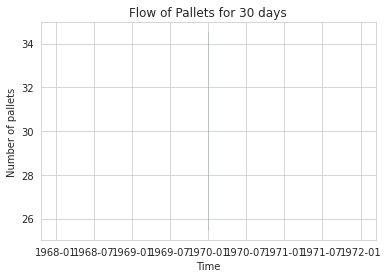

In [ ]:
#RAW
#A1 load>   A   deliver>   B   unload>   B1     deliver>    A1...
#loading is done with the speed of pallet flow (D)  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

A=50   #loaded pallet
A1=50   #A prime, empty pallet
Ta=0

B=30   #loaded pallet
B1=50   #B prime, empty pallet
Tb=0

D=10    #Pallet flow (No. of pallets per day)
Fa=5    #Frequency in Days per delivery (Days) A to B
Fb=7    #B1 to A1
T=3     #Days taken for one delivery (Days)

XFa=Fa-1   #Count to start delivery, initialized to start at the first day
XFb=Fb-1
XFTa=0      #Count until delivery reach to the other node
XFTb=0

data={"A":[A],"Ta":[Ta],"B":[B],"B1":[B1], "Tb":[Tb], "A1":[A1]} #data dictionary

Days=30 #No. of days

for i in range (1,Days+1):  #numbers of days to check
    for j in range (1,25):      #Hours
        A1-=D
        A+=D
        B-=D
        B1+=D
        if A1<0:
            print("not enough pallets at A1")
            break
        if B<0:
            print("not enough pallets at B")
            break
        XFa+=1
        XFb+=1
        #code for A to B
        if XFTa!=0:
            XFTa+=1
        if XFTa==T:
            B+=Ta
            Ta=0
            XFTa=0
        if XFa==Fa:
            XFa=0
            XFTa=1
            Ta=A-D
            A=D

        #same code for B1 to A1
        if XFTb!=0:
            XFTb+=1
        if XFTb==T:
            A1+=Tb
            Tb=0
            XFTb=0
        if XFb==Fb:
            XFb=0
            XFTb=1
            Tb=B1-D
            B1=D
        

    Total =A+A1+Ta+B+B1+Tb
    
    data["A"].append(A)
    data["Ta"].append(Ta)
    data["B"].append(B)
    data["B1"].append(B1)
    data["Tb"].append(Tb)
    data["A1"].append(A1)
   
    #print("Day no.{}: A1={}, A={}, Ta={}, B={}, B1={}, Tb={}, Total={};".format(i,A1,A,Ta,B,B1,Tb,Total))

df = pd.DataFrame(data) 
print(df)

#plt.figure(figsize=(20,20))
sns.set_style("whitegrid")
#sns.lineplot(data=df)

# Add title
plt.title("Flow of Pallets for "+str(Days)+" days")
sns.lineplot(data=df, x=df.index, y=df["B"] )
#sns.lineplot(data=df['A'], label="A"); sns.lineplot(data=df['B'], label="B"); sns.lineplot (data=df['B1'], label="B1"); sns.lineplot(data=df['A1'], label="A1") 
#sns.lineplot(data=df['Ta'], label="Ta"); sns.lineplot(data=df['Tb'], label="Tb"); #For Ta and Tb

# Add label for axes
plt.xlabel("Time"); plt.ylabel("Number of pallets")

#plt.plot(df); plt.grid(True); plt.legend()